## Hands-on 4
### Clustering
#### Construct a model to group the truck drivers
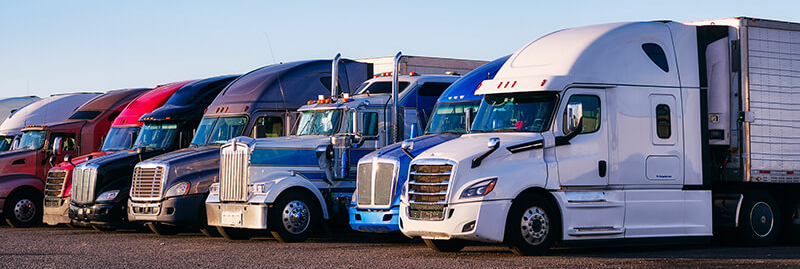

In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

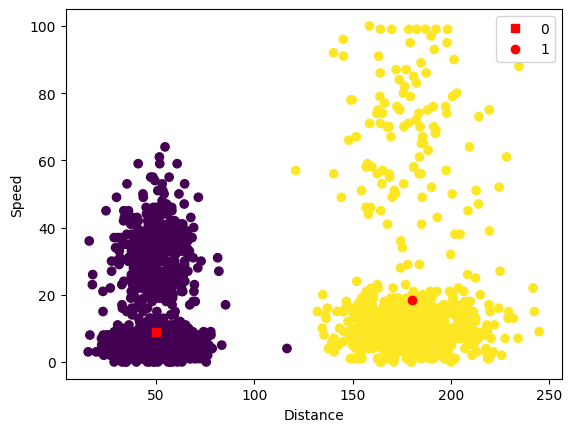

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Read dataset
df = pd.read_csv('data/drivers.csv', sep='\t', header=0)

# Store features (Column 1 & 2)
X = df.drop(columns=['Driver_ID'])

scl = StandardScaler()
Xs = scl.fit_transform(X)

# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=2, n_init=20).fit(Xs)

centers = scl.inverse_transform(km.cluster_centers_)

markers = ('rs', 'ro')
for i, m in enumerate(markers):
    plt.plot(centers[i][0], centers[i][1], m, label=i)
plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=km.labels_)
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

To do:
- Use Elbow method to check for optimum number of clusters with the scaled features

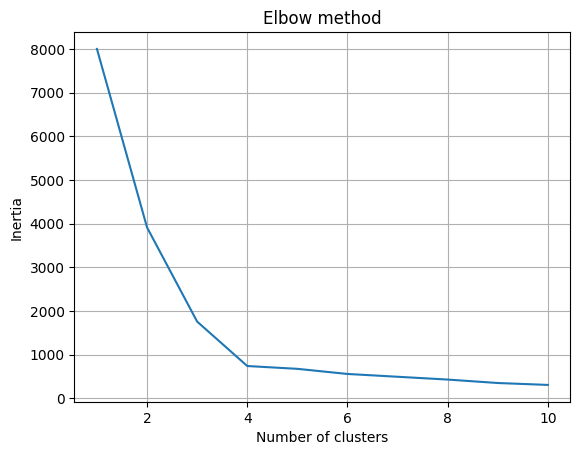

In [5]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k).fit(Xs)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.grid("both")
plt.show()

To do:
- Use silhouette score to find the optimum number of clusters

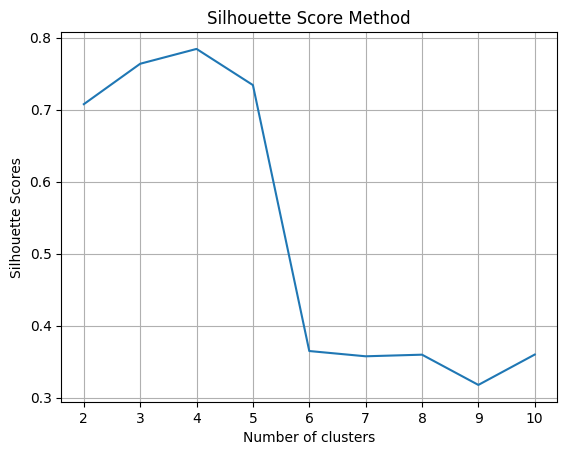

In [6]:
from sklearn.metrics import silhouette_score

sscores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(Xs)
    sscores.append(silhouette_score(Xs, km.labels_))

plt.plot(range(2, 11), sscores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Score Method")
plt.grid("both")
plt.show()

**To do:** 
- To group the truck drivers into the optimum number of cluster

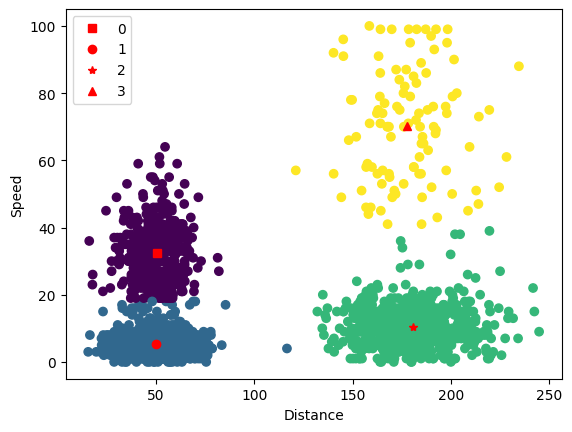

In [7]:
# Apply k-mean clustering with 4 clusters
km = KMeans(n_clusters=4, n_init=20).fit(Xs)

centers = scl.inverse_transform(km.cluster_centers_)

markers = ('rs', 'ro', 'r*', 'r^')
for i, m in enumerate(markers):
    plt.plot(centers[i][0], centers[i][1], m, label=i)
plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=km.labels_)
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

**To do:**
- Add labels to df and save it as a CSV file

In [8]:
df["Label"] = km.labels_
df.to_csv("labelled_drivers.csv", index=False)

**To do:**
- Create a k-NN model to classify the drivers
- Evaluate the performance of the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

y = df["Label"]

Xs_train, Xs_test, y_train, y_test = split(Xs, y, test_size=0.25, stratify=y, random_state=42)

knn = KNeighborsClassifier().fit(Xs_train, y_train)
print(f"knn accuracy: {knn.score(Xs_test, y_test):.3%}")

knn accuracy: 99.600%
